In [2]:
import pandas as pd

In [3]:
mvp = pd.read_csv('mvp_awards.csv').drop(columns=['id', 'season_id'])
stats = pd.read_csv('stats(2).csv')
players = pd.read_csv('players.csv')
players = players.rename(columns={'id': 'player_id'})

In [4]:
mvp['count'] = mvp['player_id'].map(mvp['player_id'].value_counts())
mvp_most_frequent = mvp.drop_duplicates(subset='player_id', keep='first').sort_values(by='count', ascending=False)
mvp_most_frequent

,player_id,count
0,115,5
8,66,5
3,162,5
11,9,4
1,135,3
13,38,3
14,99,3
6,153,3
7,109,2
35,175,2


In [5]:
merge_position = (mvp_most_frequent
                  .merge(stats[['player_id', 'Position']], on ='player_id')
                  .query("Position == 'PG'")
                  .drop_duplicates(subset = 'player_id', keep = 'first') 
                 )
plus_name = (merge_position
        .merge(players[['player_id', 'player_name']], on = 'player_id')
       )
plus_name

,player_id,count,Position,player_name
0,162,5,PG,Luka Dončić
1,135,3,PG,LeBron James
2,99,3,PG,Stephen Curry
3,153,3,PG,Chris Paul
4,109,2,PG,Damian Lillard
5,191,2,PG,Jalen Brunson
6,105,2,PG,James Harden
7,144,2,PG,Shai Gilgeous-Alexander
8,172,2,PG,Ja Morant
9,50,1,PG,De'Aaron Fox


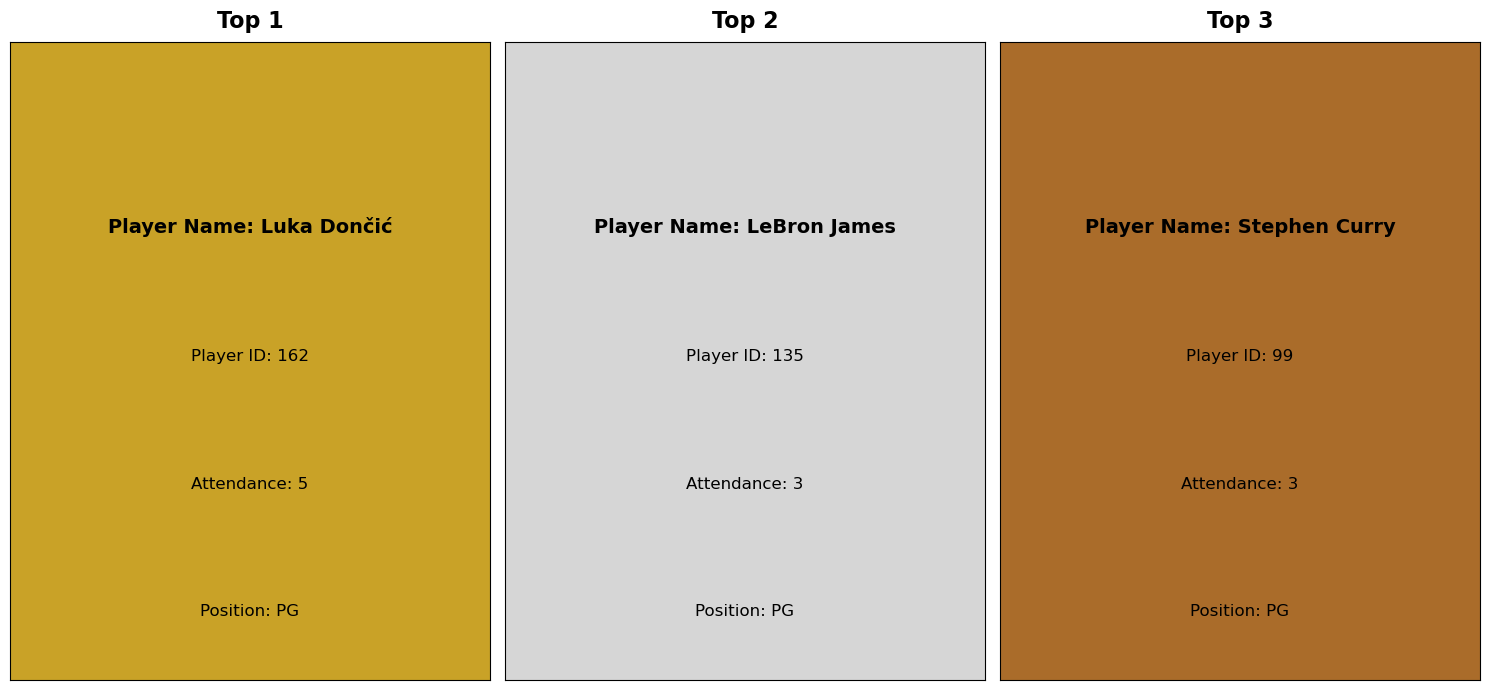

In [54]:
import matplotlib.pyplot as plt

top3 = plus_name.head(3)

fig, axes = plt.subplots(1, 3, figsize=(15, 7)) 
colors = ['#C9A227', '#D6D6D6', '#AA6C2A']


for i, (index, row) in enumerate(top3.iterrows()):
    ax = axes[i]
    ax.set_facecolor(colors[i])
    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    
    ax.text(0.5, 0.7, f"Player Name: {row['player_name']}", ha='center', fontsize=14, fontweight='bold')
    ax.text(0.5, 0.5, f"Player ID: {row['player_id']}", ha='center', fontsize=12)
    ax.text(0.5, 0.3, f"Attendance: {row['count']}", ha='center', fontsize=12)
    ax.text(0.5, 0.1, f"Position: {row['Position']}", ha='center', fontsize=12)

    ax.set_title(f"Top {i+1}", fontsize=16, fontweight='bold', pad=10)

plt.tight_layout()
plt.show()

In [6]:
#The top 3 players to be suggested to the team are as listed above.